In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
import sklearn.metrics as metrics
import math
from sklearn.metrics import mean_squared_error

from warnings import filterwarnings
filterwarnings('ignore')

In [95]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
c_train = train_df.copy()
c_test = test_df.copy()

In [96]:
c_train['train']  = 1
c_test['train']  = 0
df = pd.concat([c_train, c_test], axis=0,sort=False)

In [97]:
def category(variable):
    
    print("{} Effect of the variable on survived: \n".format(variable))
    print(train_df.groupby(variable)["SalePrice"].mean())
    
    sns.barplot(x = variable, y = "SalePrice", data = train_df)
    plt.show()

In [98]:
list_cat = ["MSZoning","Street","LotShape","LandContour","LandSlope","LotConfig","Condition1","BldgType",
            "HouseStyle","OverallCond","RoofStyle","RoofMatl","Exterior1st","MasVnrType","ExterQual","Foundation",
            "BsmtCond","BsmtFinType1","Heating","CentralAir","Electrical","KitchenQual","Functional",
            "GarageType","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"]

MSZoning Effect of the variable on survived: 

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64


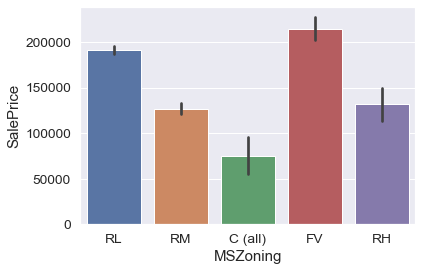

Street Effect of the variable on survived: 

Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64


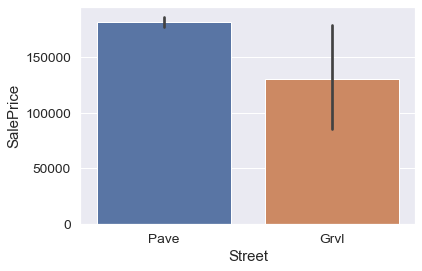

LotShape Effect of the variable on survived: 

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64


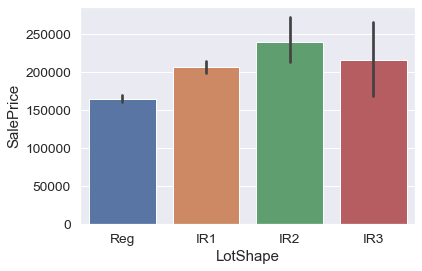

LandContour Effect of the variable on survived: 

LandContour
Bnk    143104.079365
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Name: SalePrice, dtype: float64


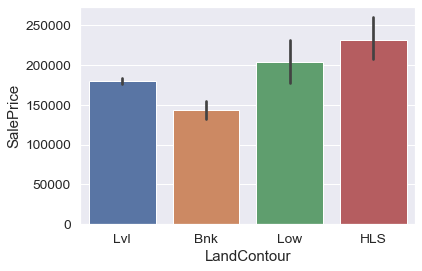

LandSlope Effect of the variable on survived: 

LandSlope
Gtl    179956.799566
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64


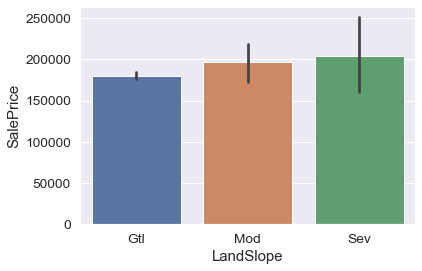

LotConfig Effect of the variable on survived: 

LotConfig
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
Name: SalePrice, dtype: float64


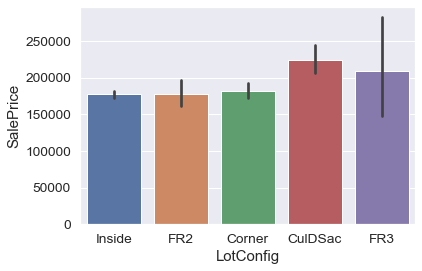

Condition1 Effect of the variable on survived: 

Condition1
Artery    135091.666667
Feedr     142475.481481
Norm      184495.492063
PosA      225875.000000
PosN      215184.210526
RRAe      138400.000000
RRAn      184396.615385
RRNe      190750.000000
RRNn      212400.000000
Name: SalePrice, dtype: float64


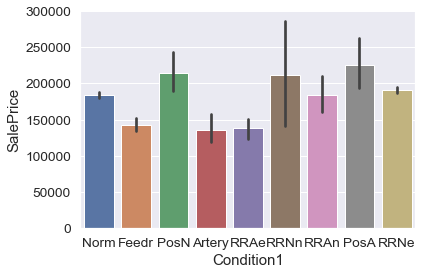

BldgType Effect of the variable on survived: 

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64


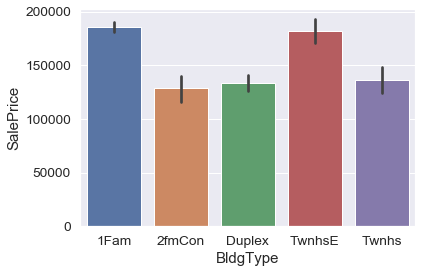

HouseStyle Effect of the variable on survived: 

HouseStyle
1.5Fin    143116.740260
1.5Unf    110150.000000
1Story    175985.477961
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210051.764045
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64


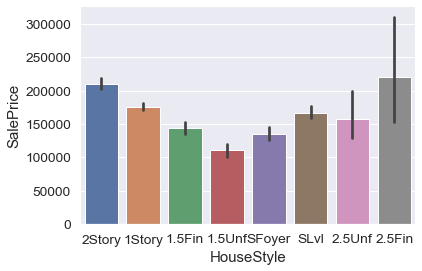

OverallCond Effect of the variable on survived: 

OverallCond
1     61000.000000
2    141986.400000
3    101929.400000
4    120438.438596
5    203146.914738
6    153961.591270
7    158145.487805
8    155651.736111
9    216004.545455
Name: SalePrice, dtype: float64


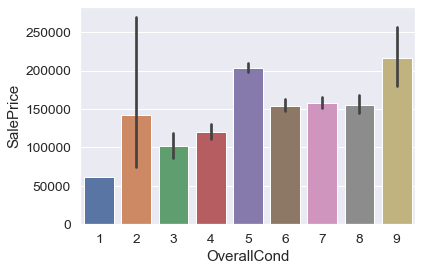

RoofStyle Effect of the variable on survived: 

RoofStyle
Flat       194690.000000
Gable      171483.956179
Gambrel    148909.090909
Hip        218876.933566
Mansard    180568.428571
Shed       225000.000000
Name: SalePrice, dtype: float64


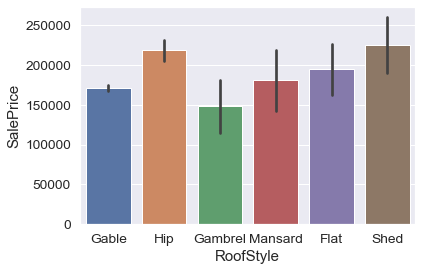

RoofMatl Effect of the variable on survived: 

RoofMatl
ClyTile    160000.000000
CompShg    179803.679219
Membran    241500.000000
Metal      180000.000000
Roll       137000.000000
Tar&Grv    185406.363636
WdShake    241400.000000
WdShngl    390250.000000
Name: SalePrice, dtype: float64


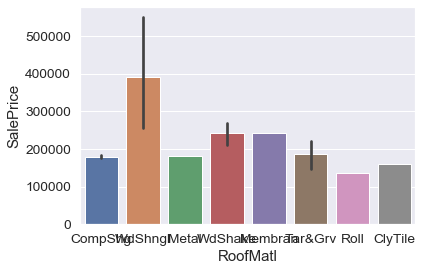

Exterior1st Effect of the variable on survived: 

Exterior1st
AsbShng    107385.550000
AsphShn    100000.000000
BrkComm     71000.000000
BrkFace    194573.000000
CBlock     105000.000000
CemntBd    231690.655738
HdBoard    163077.450450
ImStucc    262000.000000
MetalSd    149422.177273
Plywood    175942.379630
Stone      258500.000000
Stucco     162990.000000
VinylSd    213732.900971
Wd Sdng    149841.645631
WdShing    150655.076923
Name: SalePrice, dtype: float64


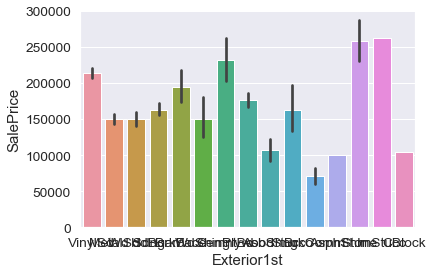

MasVnrType Effect of the variable on survived: 

MasVnrType
BrkCmn     146318.066667
BrkFace    204691.871910
None       156221.891204
Stone      265583.625000
Name: SalePrice, dtype: float64


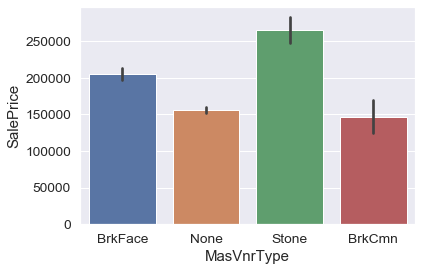

ExterQual Effect of the variable on survived: 

ExterQual
Ex    367360.961538
Fa     87985.214286
Gd    231633.510246
TA    144341.313466
Name: SalePrice, dtype: float64


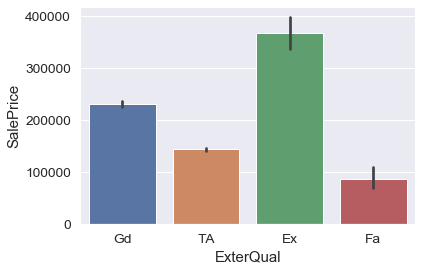

Foundation Effect of the variable on survived: 

Foundation
BrkTil    132291.075342
CBlock    149805.714511
PConc     225230.442040
Slab      107365.625000
Stone     165959.166667
Wood      185666.666667
Name: SalePrice, dtype: float64


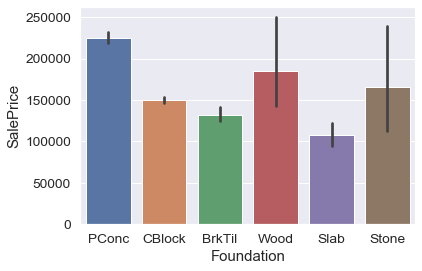

BsmtCond Effect of the variable on survived: 

BsmtCond
Fa    121809.533333
Gd    213599.907692
Po     64000.000000
TA    183632.620900
Name: SalePrice, dtype: float64


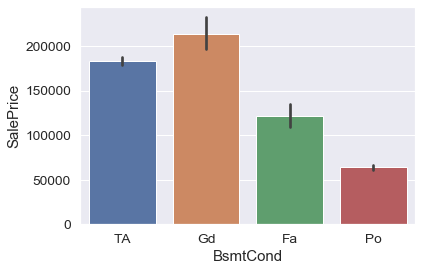

BsmtFinType1 Effect of the variable on survived: 

BsmtFinType1
ALQ    161573.068182
BLQ    149493.655405
GLQ    235413.720096
LwQ    151852.702703
Rec    146889.248120
Unf    170670.576744
Name: SalePrice, dtype: float64


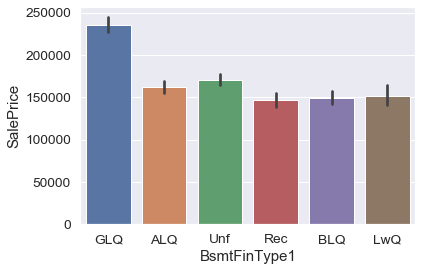

Heating Effect of the variable on survived: 

Heating
Floor     72500.000000
GasA     182021.195378
GasW     166632.166667
Grav      75271.428571
OthW     125750.000000
Wall      92100.000000
Name: SalePrice, dtype: float64


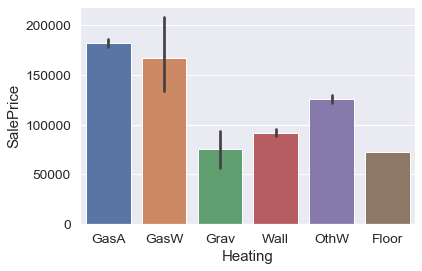

CentralAir Effect of the variable on survived: 

CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64


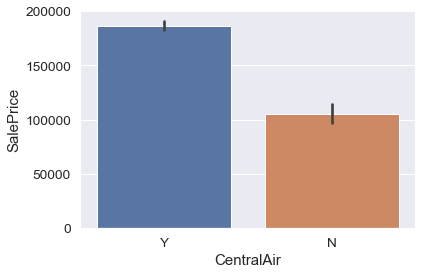

Electrical Effect of the variable on survived: 

Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    186825.113193
Name: SalePrice, dtype: float64


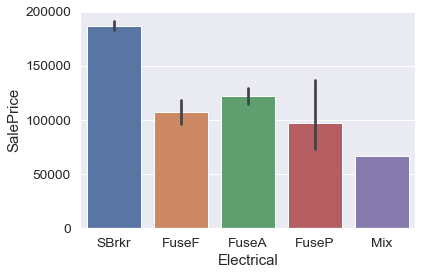

KitchenQual Effect of the variable on survived: 

KitchenQual
Ex    328554.670000
Fa    105565.205128
Gd    212116.023891
TA    139962.511565
Name: SalePrice, dtype: float64


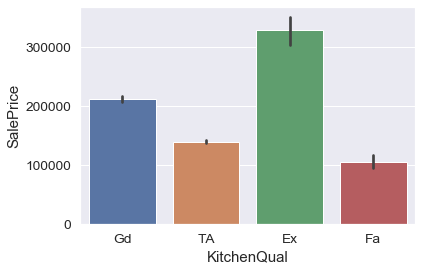

Functional Effect of the variable on survived: 

Functional
Maj1    153948.142857
Maj2     85800.000000
Min1    146385.483871
Min2    144240.647059
Mod     168393.333333
Sev     129000.000000
Typ     183429.147059
Name: SalePrice, dtype: float64


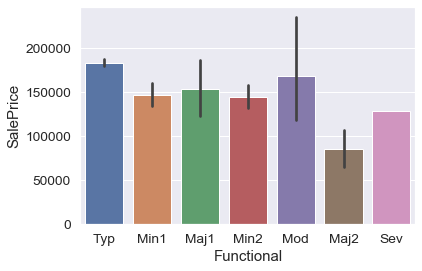

GarageType Effect of the variable on survived: 

GarageType
2Types     151283.333333
Attchd     202892.656322
Basment    160570.684211
BuiltIn    254751.738636
CarPort    109962.111111
Detchd     134091.162791
Name: SalePrice, dtype: float64


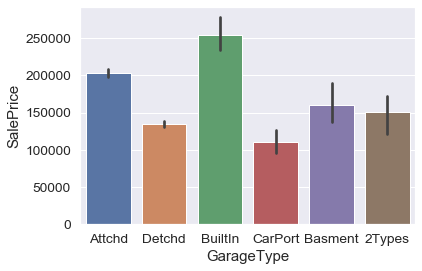

PoolQC Effect of the variable on survived: 

PoolQC
Ex    490000
Fa    215500
Gd    201990
Name: SalePrice, dtype: int64


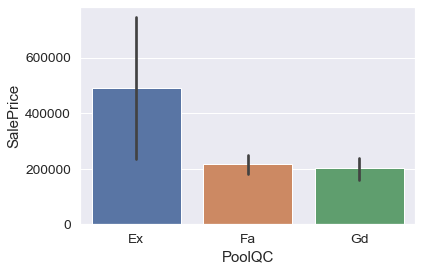

Fence Effect of the variable on survived: 

Fence
GdPrv    178927.457627
GdWo     140379.314815
MnPrv    148751.089172
MnWw     134286.363636
Name: SalePrice, dtype: float64


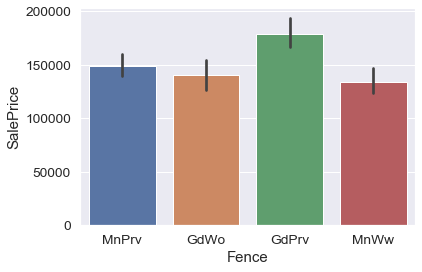

MiscFeature Effect of the variable on survived: 

MiscFeature
Gar2    170750.000000
Othr     94000.000000
Shed    151187.612245
TenC    250000.000000
Name: SalePrice, dtype: float64


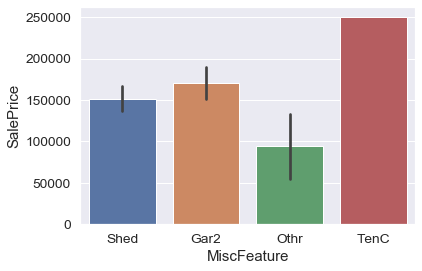

SaleType Effect of the variable on survived: 

SaleType
COD      143973.255814
CWD      210600.000000
Con      269600.000000
ConLD    138780.888889
ConLI    200390.000000
ConLw    143700.000000
New      274945.418033
Oth      119850.000000
WD       173401.836622
Name: SalePrice, dtype: float64


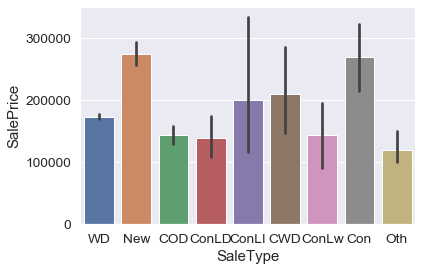

SaleCondition Effect of the variable on survived: 

SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    272291.752000
Name: SalePrice, dtype: float64


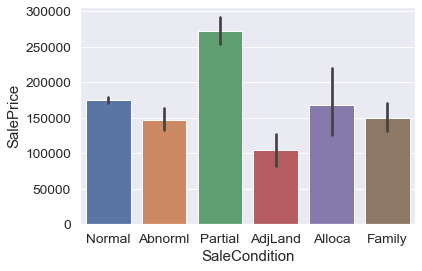

In [99]:
for i in list_cat:
    category(i)

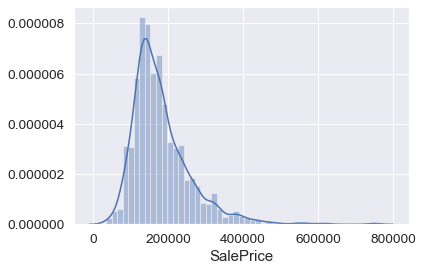

In [100]:
sns.distplot(train_df["SalePrice"])

In [101]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

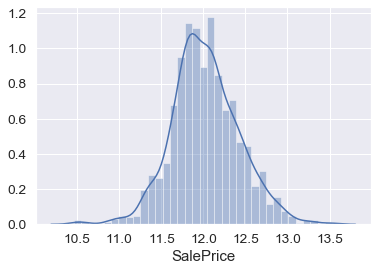

In [102]:
sns.distplot(train_df["SalePrice"])

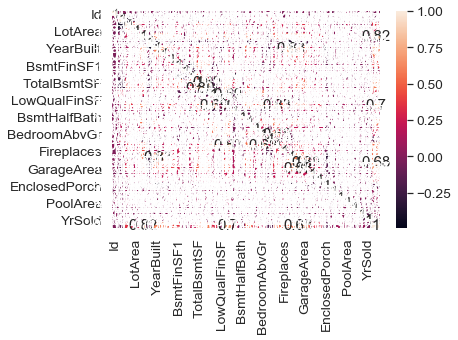

In [103]:
df_corr = train_df.corr()
sns.heatmap(df_corr,annot=True)

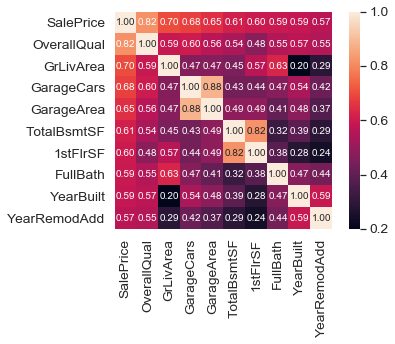

In [104]:
k = 10 
cols = df_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

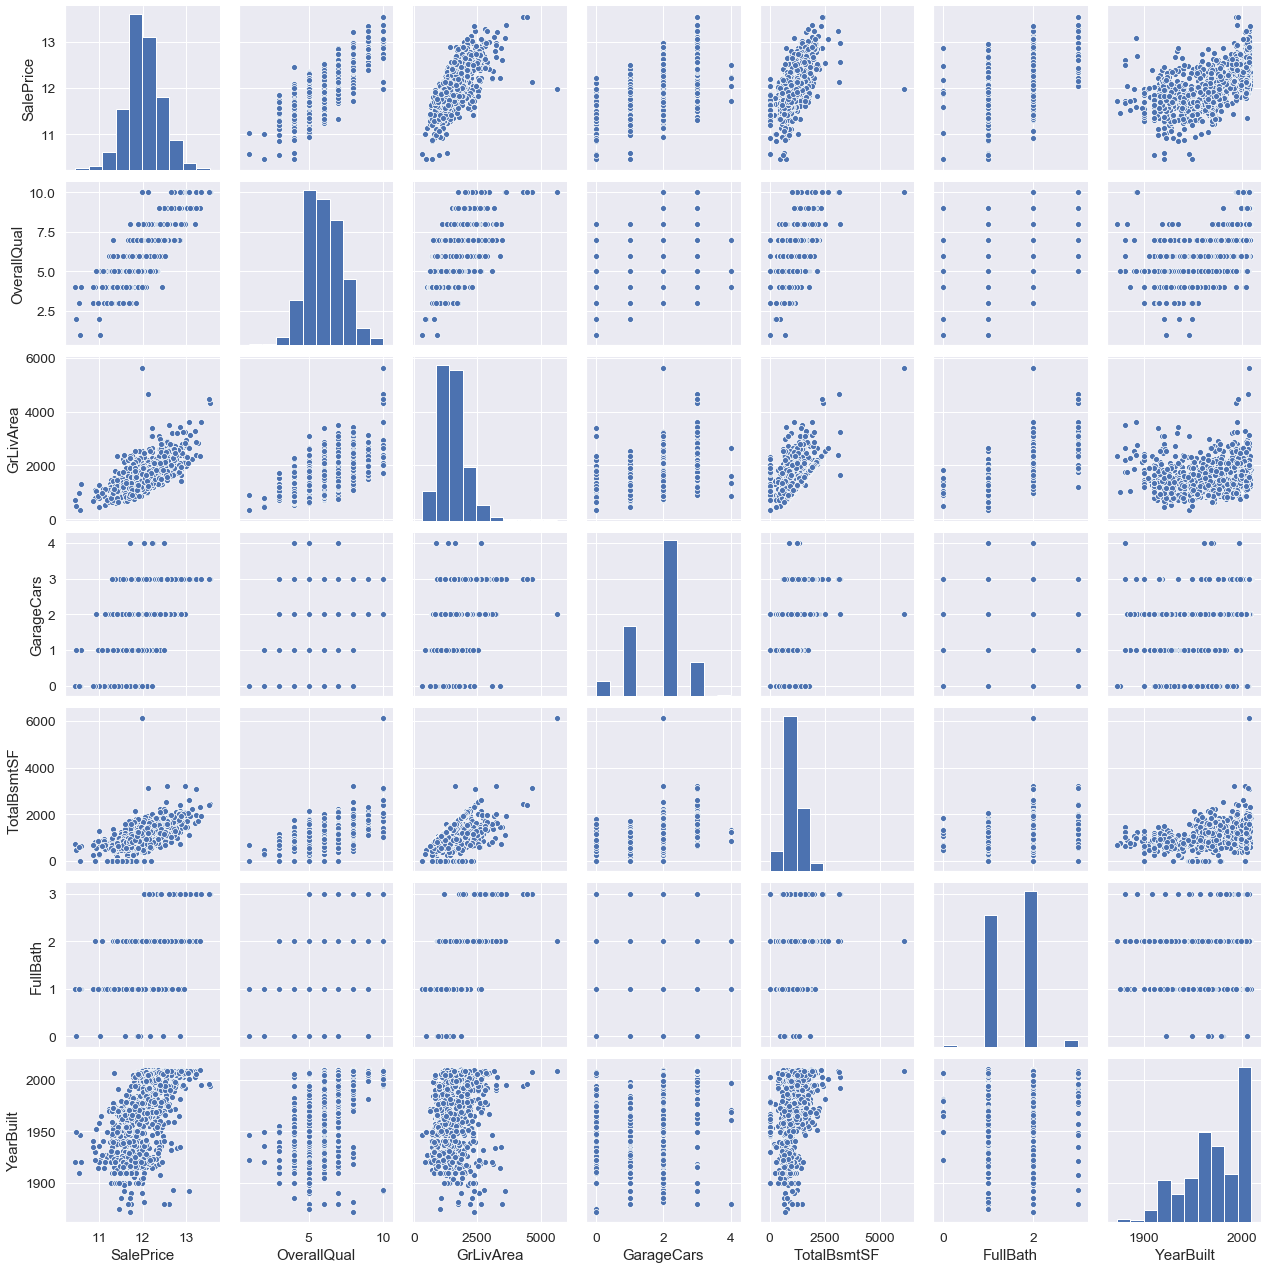

In [105]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

In [106]:
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

In [107]:
NAN = NAN[NAN.percentage > 50]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506


In [108]:
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [109]:
object_columns_df = df.select_dtypes(include=['object'])
numerical_columns_df =df.select_dtypes(exclude=['object'])

In [110]:
null_counts = object_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64


In [111]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns_df[columns_None]= object_columns_df[columns_None].fillna('None')

In [112]:
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
object_columns_df[columns_with_lowNA] = object_columns_df[columns_with_lowNA].fillna(object_columns_df.mode().iloc[0])

In [113]:
null_counts = numerical_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
train               0
dtype: int64


In [114]:
numerical_columns_df['GarageYrBlt'] = numerical_columns_df['GarageYrBlt'].fillna(numerical_columns_df['YrSold']-35)
numerical_columns_df['LotFrontage'] = numerical_columns_df['LotFrontage'].fillna(68)

In [115]:
numerical_columns_df= numerical_columns_df.fillna(0)

In [116]:
object_columns_df = object_columns_df.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

In [117]:
numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [118]:
Negatif = numerical_columns_df[numerical_columns_df['Age_House'] < 0]
Negatif

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House
1089,2550,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,...,0,0,0,0,17000,10,2007,0.0,0,-1


In [119]:
numerical_columns_df.loc[numerical_columns_df['YrSold'] < numerical_columns_df['YearBuilt'],'YrSold' ] = 2009
numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count    2919.000000
mean       36.480644
std        30.335358
min         0.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [120]:
numerical_columns_df['TotalBsmtBath'] = numerical_columns_df['BsmtFullBath'] + numerical_columns_df['BsmtFullBath']*0.5
numerical_columns_df['TotalBath'] = numerical_columns_df['FullBath'] + numerical_columns_df['HalfBath']*0.5 
numerical_columns_df['TotalSA']=numerical_columns_df['TotalBsmtSF'] + numerical_columns_df['1stFlrSF'] + numerical_columns_df['2ndFlrSF']

In [121]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_df['ExterQual'] = object_columns_df['ExterQual'].map(bin_map)
object_columns_df['ExterCond'] = object_columns_df['ExterCond'].map(bin_map)
object_columns_df['BsmtCond'] = object_columns_df['BsmtCond'].map(bin_map)
object_columns_df['BsmtQual'] = object_columns_df['BsmtQual'].map(bin_map)
object_columns_df['HeatingQC'] = object_columns_df['HeatingQC'].map(bin_map)
object_columns_df['KitchenQual'] = object_columns_df['KitchenQual'].map(bin_map)
object_columns_df['FireplaceQu'] = object_columns_df['FireplaceQu'].map(bin_map)
object_columns_df['GarageQual'] = object_columns_df['GarageQual'].map(bin_map)
object_columns_df['GarageCond'] = object_columns_df['GarageCond'].map(bin_map)
object_columns_df['CentralAir'] = object_columns_df['CentralAir'].map(bin_map)
object_columns_df['LotShape'] = object_columns_df['LotShape'].map(bin_map)
object_columns_df['BsmtExposure'] = object_columns_df['BsmtExposure'].map(bin_map)
object_columns_df['BsmtFinType1'] = object_columns_df['BsmtFinType1'].map(bin_map)
object_columns_df['BsmtFinType2'] = object_columns_df['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_df['PavedDrive'] = object_columns_df['PavedDrive'].map(PavedDrive)

In [122]:
rest_object_columns = object_columns_df.select_dtypes(include=['object'])
object_columns_df = pd.get_dummies(object_columns_df, columns=rest_object_columns.columns) 

In [123]:
df_final = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
df_final.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,3,4,2,4,2,2,6,1,4,1,...,0,0,2,2008,208500.0,1,5,1.5,2.5,2566.0
1,3,2,2,4,2,4,5,1,4,1,...,0,0,5,2007,181500.0,1,31,0.0,2.0,2524.0
2,2,4,2,4,2,2,6,1,4,1,...,0,0,9,2008,223500.0,1,7,1.5,2.5,2706.0
3,2,2,2,2,4,2,5,1,4,1,...,0,0,2,2006,140000.0,1,91,1.5,1.0,2473.0
4,2,4,2,4,2,3,6,1,4,1,...,0,0,12,2008,250000.0,1,8,1.5,2.5,3343.0


In [124]:
df_final = df_final.drop(['Id',],axis=1)

df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)


df_test = df_final[df_final['train'] == 0]
df_test = df_test.drop(['SalePrice'],axis=1)
df_test = df_test.drop(['train',],axis=1)


In [125]:
y= df_train['SalePrice']
X = df_train.drop(['SalePrice'],axis=1)

### RF

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf_model = RandomForestRegressor(random_state = 42)

In [129]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [130]:
rf_model.predict(X_test)[0:5]

array([138434.5 , 332146.72, 118615.5 , 156351.5 , 312930.05])

In [131]:
y_pred = rf_model.predict(X_test)

In [132]:
np.sqrt(mean_squared_error(y_test, y_pred))

27854.850743137955

In [133]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [134]:
rf_model = RandomForestRegressor(random_state = 42)

In [135]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [136]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [137]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 15, 'n_estimators': 500}

In [138]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 15, 
                                 n_estimators =500)

In [139]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [140]:
y_pred = rf_tuned.predict(X_test)

In [141]:
np.sqrt(mean_squared_error(y_test, y_pred))

29182.424711996657

In [142]:
str(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

'29182.424711996657'

### GBM

In [146]:
from sklearn.ensemble import GradientBoostingRegressor

In [147]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [148]:
y_pred1 = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred1))

25925.4891230378

In [149]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [151]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 62.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 89.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 157.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 193.9min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 217.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [152]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 2000,
 'subsample': 0.75}

In [153]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 3, 
                                      n_estimators = 2000, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [154]:
y_pred1 = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

29182.424711996657

In [155]:
str(math.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

'23466.637659704513'

In [156]:
gbm_tuned.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [150]:
rf_tuned.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [157]:
predict1 = rf_tuned.predict(df_test)
predict2 = gbm_tuned.predict(df_test)
predict_total = ( predict1*0.45 + predict2 * 0.55)

In [158]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": predict_total
    })
submission.to_csv('HousePricesAdvancedRegressionTechniques.csv', index=False)